In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten #dense katmanı yoğunluk katmanıdır,
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist





2024-02-18 11:08:47.286205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 11:08:47.286248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 11:08:47.287686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 11:08:47.295312: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 11:08:48.528683: W tensorflow/compiler/tf2

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #X bağımsız y bağımlı yaptık
print(X_train.shape)
print(X_test.shape)





(60000, 28, 28)
(10000, 28, 28)


In [3]:
temp = []
for i in range(len(Y_train)):
    temp.append(to_categorical(Y_train[i], num_classes = 10))
Y_train = np.array(temp)

temp = []    
for i in range(len(Y_test)):
    temp.append(to_categorical(Y_test[i], num_classes = 10))
Y_test = np.array(temp)


In [4]:

model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/15


2024-02-18 11:09:03.193517: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: nan - acc: 0.2797 - val_loss: nan - val_acc: 0.0980
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val

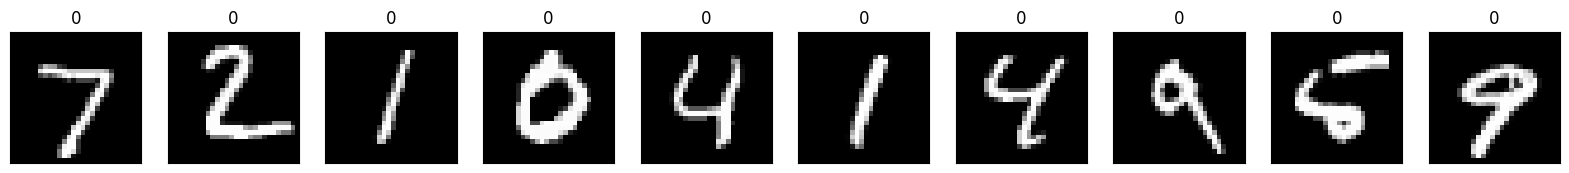

In [5]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train, Y_train, epochs = 15, validation_data = (X_test, Y_test))
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))

for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()